In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


D:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

In [ ]:
f = h5py.File("Data/food_c101_n10099_r64x64x3.h5","r")

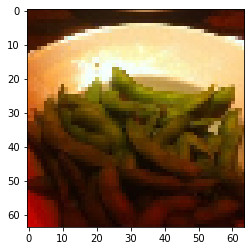

In [ ]:
imshow(f["images"][0])

In [ ]:
list(f.keys())

['category', 'category_names', 'images']

In [ ]:
f["category"][0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [ ]:
f["category_names"][0]

b'apple_pie'

In [ ]:
X_train = f["images"][:]
ref = f["category_names"][:]
Y_train = f["category"][:]

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(ref.shape)

(10099, 64, 64, 3)
(10099, 101)
(101,)


strawberry_shortcake


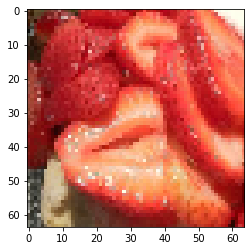

In [ ]:
idx = 1401
imshow(X_train[idx])
print(ref[np.where((Y_train[idx]*1)==1)[0][0]].decode())

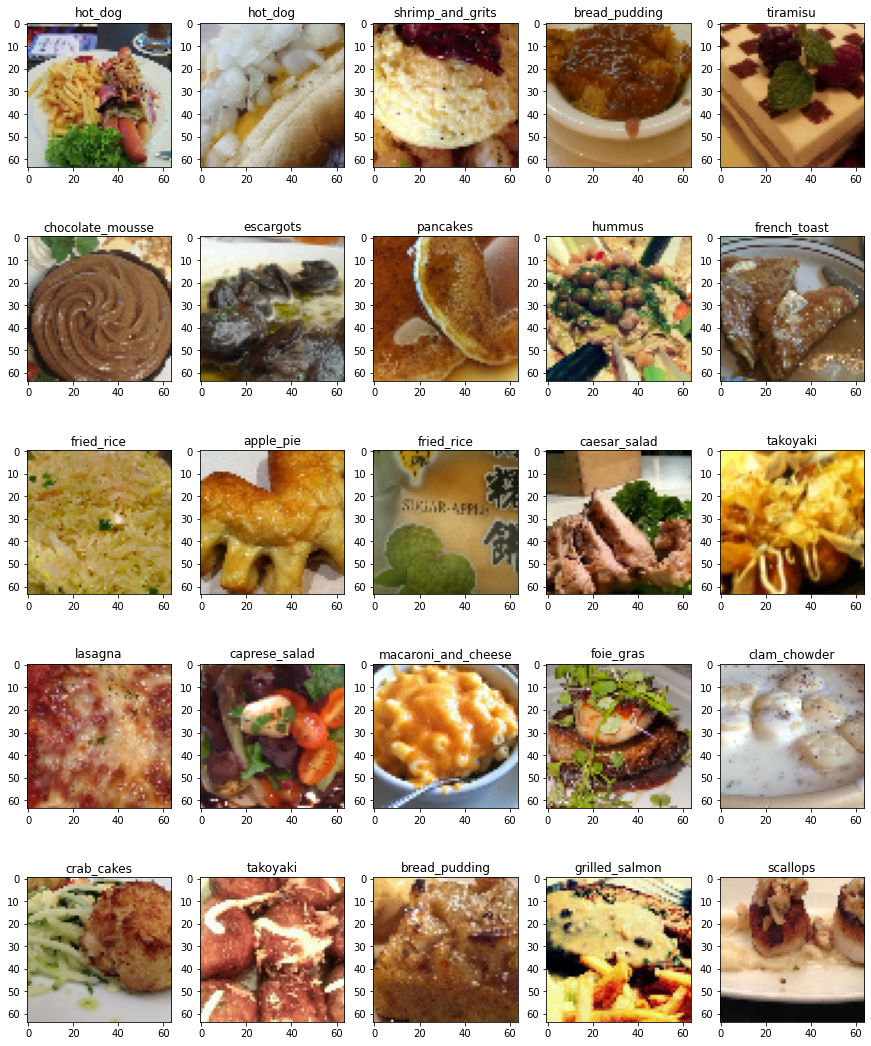

In [ ]:
fig, ax = plt.subplots(5,5,figsize = (15,19))
idx = 25
for i in range(5):
    for j in range(5):
        ax[i,j].imshow(X_train[idx])
        ax[i,j].set_title(ref[np.where((Y_train[idx]*1)==1)[0][0]].decode())
        idx+=1

In [ ]:
Y_train_nht = np.asarray([np.where((Y_train[idx]*1)==1)[0][0] for idx in range(0,10099)])
Y_train_nht.shape

(10099,)

In [ ]:
resnet = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(64,64,3),
    pooling = "avg"
)
flat = keras.layers.Flatten()(resnet.output)
flat = keras.layers.Dense(units = 101,activation = tf.nn.sigmoid)(flat)
model = tf.keras.models.Model(inputs = resnet.input,outputs = flat)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

In [ ]:
model.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy",metrics = ["accuracy"])
model.fit(X_train,Y_train_nht,epochs = 10,batch_size = 64)

Epoch 1/10
10099/10099 [==============================] - 41s 4ms/sample - loss: 4.8556 - acc: 0.0268
Epoch 2/10
10099/10099 [==============================] - 35s 3ms/sample - loss: 4.7743 - acc: 0.0248
Epoch 3/10
10099/10099 [==============================] - 33s 3ms/sample - loss: 4.6296 - acc: 0.0268
Epoch 4/10
10099/10099 [==============================] - 33s 3ms/sample - loss: 4.3882 - acc: 0.0421
Epoch 5/10
10099/10099 [==============================] - 33s 3ms/sample - loss: 4.2550 - acc: 0.0600
Epoch 6/10
10099/10099 [==============================] - 33s 3ms/sample - loss: 4.1343 - acc: 0.0681
Epoch 7/10
10099/10099 [==============================] - 34s 3ms/sample - loss: 4.0080 - acc: 0.0869
Epoch 8/10
10099/10099 [==============================] - 34s 3ms/sample - loss: 3.8507 - acc: 0.1069
Epoch 9/10
10099/10099 [==============================] - 33s 3ms/sample - loss: 3.6375 - acc: 0.1362
Epoch 10/10
10099/10099 [==============================] - 33s 3ms/sample - loss: 

In [ ]:
model.evaluate(X_train,Y_train_nht)

10099/10099 [==============================] - 13s 1ms/sample - loss: 3.0047 - acc: 0.2542


[3.004666511534889, 0.2541836]

In [ ]:
model.evaluate(X_test,)